# 1. L1/L2 регуляризация 
-----
1. У нас есть данные ввиде множества пар $X$ и $y$: $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$
2. Мы хотим найти такую функцию $\hat{f}(x)$ которая бы минимизировала 
$$
MSE(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 \rightarrow \text{min}_{\theta}
$$
3. Мы будем искать $\hat{f}(x)$ в предположении что это линейная функция:
$$
\hat{f}(x, \theta) = \theta_0 + x^{[1]}\theta_1 + x^{[2]}\theta_2 + \ldots + x^{[m]}\theta_m
$$

**Вопрос**:

Как запретить коэффициентам $\theta$ быть большими?

**Ответ**:

Возьмем и добавим их в оптимизируемую функцию, т.к. мы ищем минимиум этой функции то в процессе оптимизации 
они будут (по-крайней мере мы на это надеемся) уменьшаться:


$$
MSE_{l_1}(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 + \alpha \sum_{j=1}^m |\theta_j| \rightarrow \text{min}
$$

$$
MSE_{l_2}(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 + \alpha \sum_{j=1}^m \theta_j^2 \rightarrow \text{min}
$$


Обратите внимание что в сумме по тетта  индексация начинается с 1, а не с 0. Поскольку свободный коэффициент $\theta_0$ **нет смысла регуляризовывать** — если мы будем штрафовать за его величину, то получится, что мы учитываем некие априорные представления о близости целевой переменной к нулю и отсутствии необходимости в учёте её смещения. 

Коэффициент $\alpha$ называется **параметром регуляризации** и контролирует баланс
между подгонкой под обучающую выборку и штрафом за излишнюю сложность, этот параметр **подбирается на кросс-валидации**.


-----

-----

Обе модели реализованы в sklearn в модуле linear_models:

sklearn.linear_models.Lasso $\rightarrow l_1$

sklearn.linear_models.Ridge $\rightarrow l_2$

Давайте посмотрим как это выглядит на практике

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Lasso, Ridge, SGDRegressor, ElasticNet, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression

from sklearn.metrics import mean_squared_error

In [2]:
params = {
    'n_samples':2000,
    'n_features':9,
    'n_informative':5,
    'bias':10,
    'noise':5,
    'coef':True, 
    'random_state': 51
}


X, y, _coef = make_regression(**params)


# Загляните внутрь функции make_regression, что означает каждый параметр?
# курсор внутрь круглых скобок и нажать shift+TAB

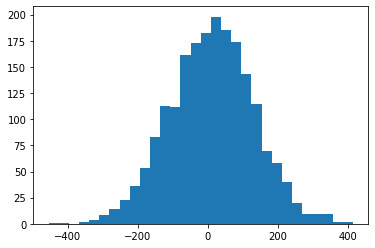

In [3]:
 plt.hist(y, bins=30);

In [4]:
print('Истинные коэффициенты модели:\n', np.round(_coef, 3), )

Истинные коэффициенты модели:
 [67.246  0.    16.882 98.986  0.    15.995  0.     2.751  0.   ]


## 2.1 Lasso регуляризация

1. Создайте класс Lasso с параметрами:
    - `alpha=50`
    - `fit-intercept=True`
    - `random_state=33`
2. Обучите модель Лассо регресии на данных X: `model.fit(X, y)`
3. Предскажите с помощью этой модели значения целевой переменной: `model.predict(X)`
4. Посчитайте MSE между предсказанным и истинным значением.
5. Напечатайте веса обученной линейной модели. Что вы можете о них сказать?
6. Используя параметр `alpha=15, 5, 2, 1, 0.3, 0.1, 0.03` обучите модель Lasso и посторойте зависимость **нормы** вектора весов $\theta$ от величины `alpha`.
7. Для различных значения `alpha` постройте распределение параметров `\theta`. Для этого измените параметры функции `make_regression` увеличив общее количество признаков `n_features`, количество "информативных" признаков `n_informative` и количество наблюдений `n_samples`.

Для выполнения пункта 7 и 8. напишите функцию которая принимает на вход параметр alpha, матрицу X, и вектор y, а возвразает вам вектор весов и MSE.

In [5]:
lr_lasso = Lasso(alpha = 50, fit_intercept = True, random_state = 33)

In [6]:
lr_lasso.fit(X,y)
y_pred_lasso = lr_lasso.predict(X)
print('MSE: {}'.format(mean_squared_error(y,y_pred_lasso)))

MSE: 5717.182944100362


In [7]:
lr_lasso.coef_

array([17.20788804,  0.        ,  0.        , 45.99958806, -0.        ,
        0.        ,  0.        ,  0.        , -0.        ])

In [8]:
def lasso_weight(alpha_new, X, y) :
  lr_lasso_new = Lasso(alpha = alpha_new, fit_intercept = True, random_state = 33)
  lr_lasso_new.fit(X,y)
  y_pred_lasso_new = lr_lasso_new.predict(X)
  return (lr_lasso_new.coef_, mean_squared_error(y,y_pred_lasso_new))

In [9]:
alphas = np.array([15, 5, 2, 1, 0.3, 0.1, 0.03])
weights_norm = []
mse_alphas = []
for i in alphas :
  new_res = lasso_weight(i, X, y)
  weights_norm.append(np.linalg.norm(new_res[0]))
  mse_alphas.append(new_res[1])

In [10]:
weights_norm

[97.96940837906298,
 113.56181541112029,
 118.53363862510655,
 120.23010412371879,
 121.42832366045921,
 121.77205619781653,
 121.89257255689193]

In [11]:
mse_alphas

[947.4896599287357,
 134.4922215803038,
 44.39137786133196,
 29.321706481580446,
 24.750573240358595,
 24.31201021463714,
 24.247751486165757]

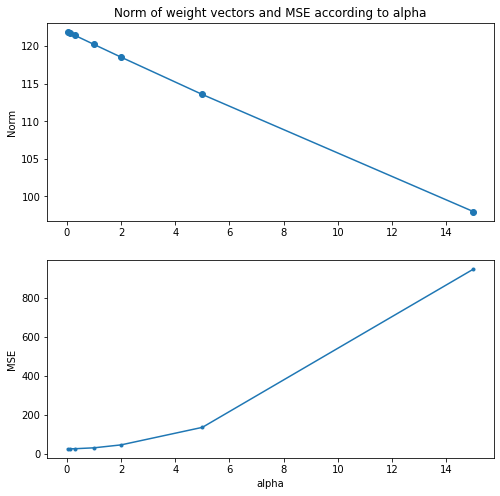

In [12]:
plt.figure(figsize = (8,8))
plt.subplot(2, 1, 1)
plt.plot(alphas, weights_norm, 'o-')
plt.title('Norm of weight vectors and MSE according to alpha')
plt.ylabel('Norm')

plt.subplot(2, 1, 2)
plt.plot(alphas, mse_alphas, '.-')
plt.xlabel('alpha')
plt.ylabel('MSE')

plt.show()

In [32]:
params_new = {
    'n_samples':22000,
    'n_features':100,
    'n_informative':70,
    'bias':10,
    'noise':5,
    'coef':True, 
    'random_state': 51
}


X_new, y_new, _coef_new = make_regression(**params)

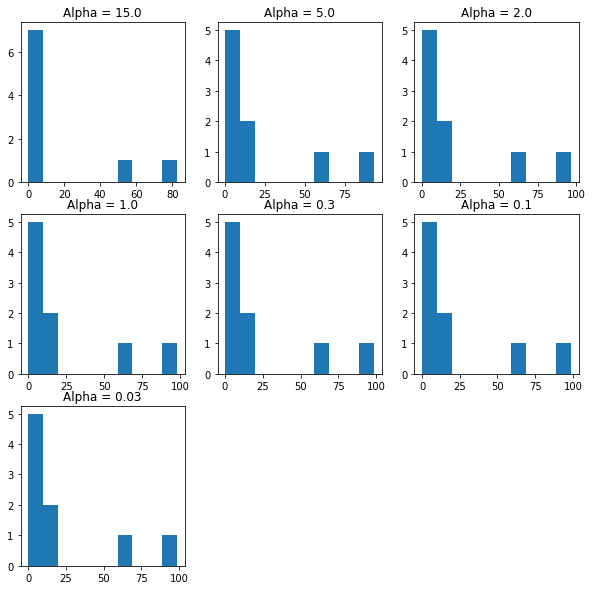

In [33]:
plt.figure(figsize = (10,10))
j = 1

for i in alphas :
  new_res = lasso_weight(i, X_new, y_new)
  ax1 = plt.subplot(3,3, j)
  ax1.hist(new_res[0], bins = 10)
  ax1.set_title("Alpha = {}".format(i))
  j += 1
     

## 2.2 Ridge регуляризация

1. Тоже но для Ridge регрессии
2. Что вы можете сказать об отличиях между результатами Ridge и Lasso?

In [34]:
lr_ridge = Ridge(alpha = 50, fit_intercept = True, random_state = 33)

In [35]:
lr_ridge.fit(X,y)
y_pred_ridge = lr_ridge.predict(X)
print('MSE: {}'.format(mean_squared_error(y,y_pred_ridge)))

MSE: 33.41231735676434


In [36]:
print(lr_ridge.coef_)

[ 6.56410616e+01  3.73049473e-03  1.63373730e+01  9.64430338e+01
 -1.92573293e-01  1.55601747e+01  3.45338984e-02  2.83875351e+00
  1.51798607e-01]


In [37]:
def ridge_weight(alpha_new, X, y) :
  lr_ridge_new = Ridge(alpha = alpha_new, fit_intercept = True, random_state = 33)
  lr_ridge_new.fit(X,y)
  y_pred_ridge_new = lr_ridge_new.predict(X)
  return (lr_ridge_new.coef_, mean_squared_error(y,y_pred_ridge_new))

In [38]:
weights_norm_ridge = []
mse_alphas_ridge = []
for i in alphas :
  new_res = ridge_weight(i, X, y)
  weights_norm_ridge.append(np.linalg.norm(new_res[0]))
  mse_alphas_ridge.append(new_res[1])

In [39]:
weights_norm_ridge

[121.0015130220205,
 121.62832985974038,
 121.81764548562415,
 121.88088195985593,
 121.92518663897091,
 121.937851045999,
 121.94228421113792]

In [40]:
mse_alphas_ridge

[25.096668710447023,
 24.33722975682501,
 24.256602446262047,
 24.245045470418358,
 24.241535245701474,
 24.241226415653486,
 24.241191278268126]

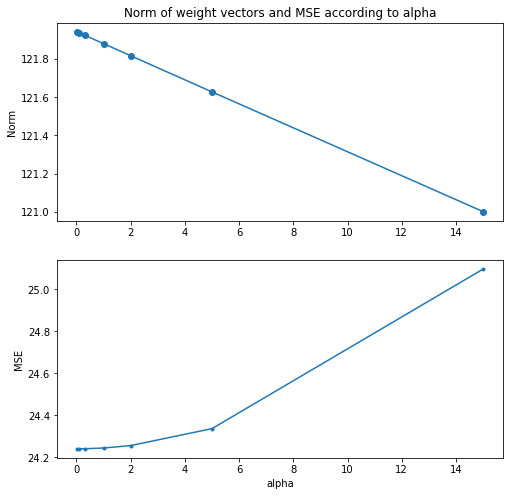

In [41]:
plt.figure(figsize = (8,8))
plt.subplot(2, 1, 1)
plt.plot(alphas, weights_norm_ridge, 'o-')
plt.title('Norm of weight vectors and MSE according to alpha')
plt.ylabel('Norm')

plt.subplot(2, 1, 2)
plt.plot(alphas, mse_alphas_ridge, '.-')
plt.xlabel('alpha')
plt.ylabel('MSE')

plt.show()

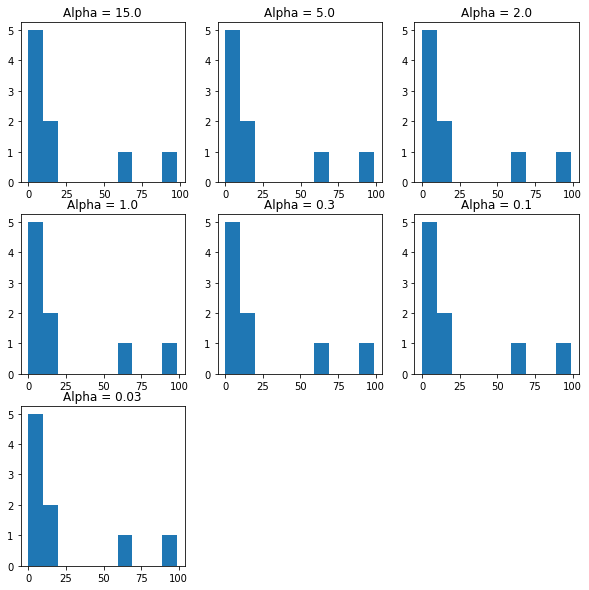

In [42]:
plt.figure(figsize = (10,10))
j = 1

for i in alphas :
  new_res = ridge_weight(i, X_new, y_new)
  ax1 = plt.subplot(3,3, j)
  ax1.hist(new_res[0], bins = 10)
  ax1.set_title("Alpha = {}".format(i))
  j += 1

## 2.3 Давайте посмотрим что происходит с весами модели, в процессе обучения градиентным спуском Лассо регрессии

Что происходит со значениями $\theta$ в процессе обучения

In [43]:
sgd_params = {
    'loss':'squared_error',
    'penalty':'l1',
    'alpha':.1,
    'l1_ratio':1,
    'fit_intercept':True,
    'max_iter':None, 
    'shuffle':True,
    'random_state':76,
    'eta0' : 0.05,
    'learning_rate':'constant',
}

In [44]:
coef = []
intercept = []

for m_iter in range(1, 20, 1):
    
    sgd_params['max_iter'] = m_iter
    model = SGDRegressor(**sgd_params)
    model.fit(X, y)
    
    coef.append(model.coef_)
    intercept.append(model.intercept_)
    
coef = np.array(coef)
intercept = np.array(intercept)
print(model.coef_, model.intercept_)

[66.41639425  0.         15.41232901 98.47611706  0.         15.94692213
  0.          2.63564488  0.        ] [11.19759851]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_

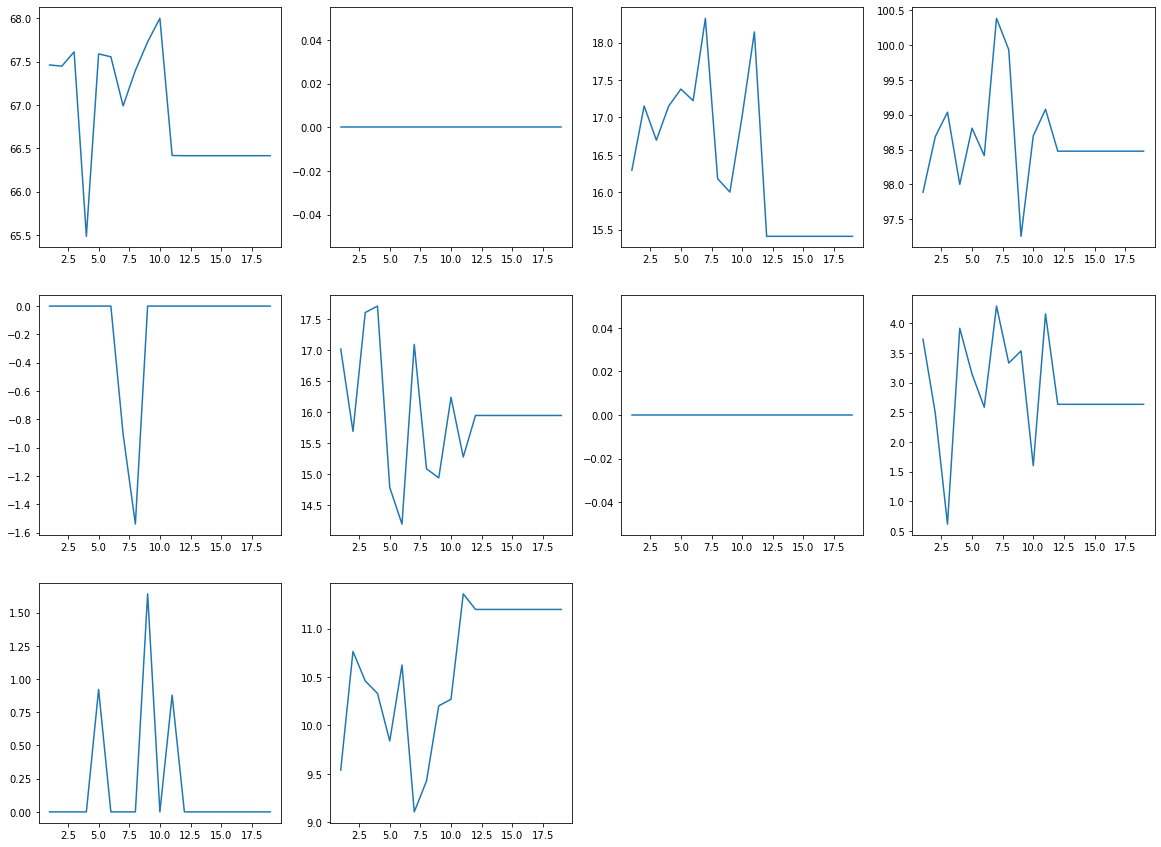

In [45]:
plt.figure(figsize=(20,15))
for n in range(1, 10):
    ax = plt.subplot(int('34{}'.format(n)))
    ax.plot(list(range(1, 20, 1)), coef[:, n-1])
    
ax = plt.subplot(3,4,10)
ax.plot(list(range(1, 20, 1)), intercept)

## 2.4 Сравните с поведением весов модели в случае Гребневой регрессии

In [46]:
sgd_params['penalty'] = 'l2'
sgd_params['l1_ratio'] = 0

In [47]:
coef = []
intercept = []

for m_iter in range(1, 20, 1):
    
    sgd_params['max_iter'] = m_iter
    model = SGDRegressor(**sgd_params)
    model.fit(X, y)
    
    coef.append(model.coef_)
    intercept.append(model.intercept_)
    
coef = np.array(coef)
intercept = np.array(intercept)
print(model.coef_, model.intercept_)

[61.67542138  0.24503548 15.4620448  88.66348563  0.70621003 14.24509465
 -1.99278073  1.68919835  2.56662455] [12.16015707]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_

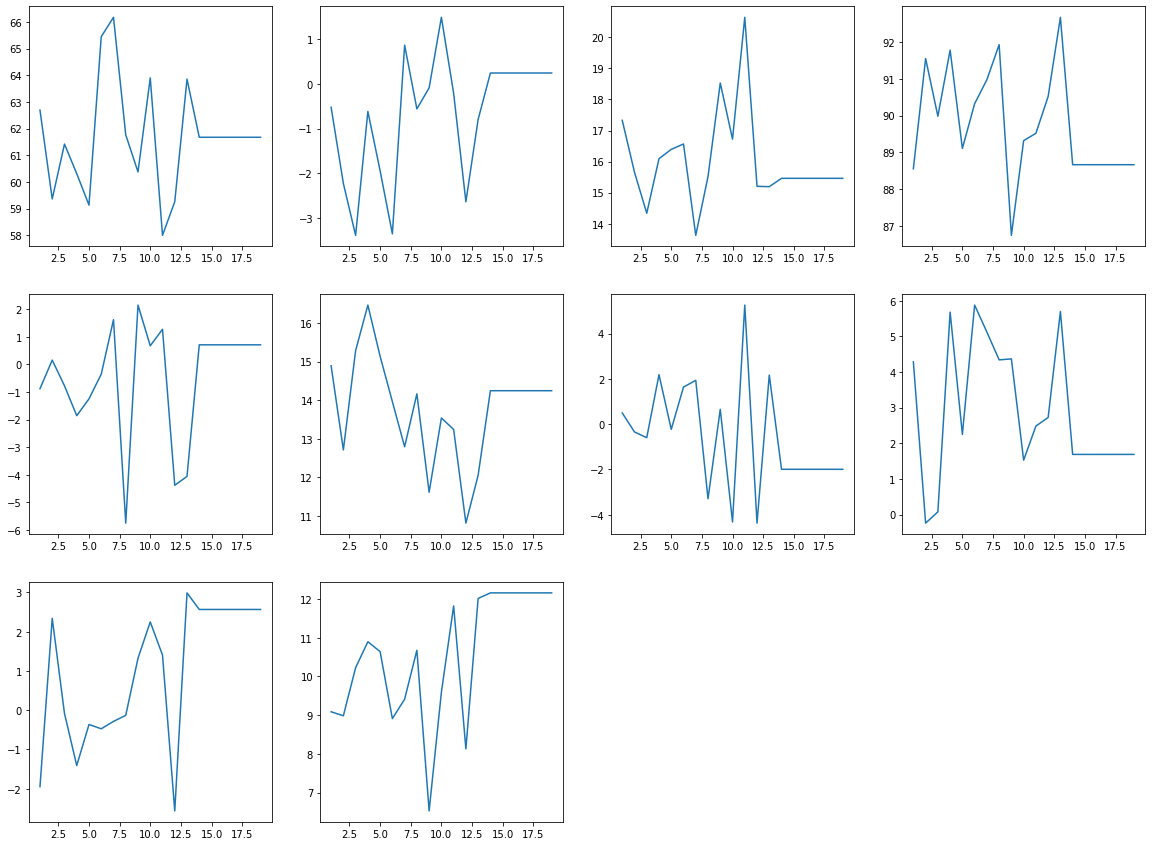

In [48]:
plt.figure(figsize=(20,15))
for n in range(1, 10):
    ax = plt.subplot(int('34{}'.format(n)))
    ax.plot(list(range(1, 20, 1)), coef[:, n-1])
    
ax = plt.subplot(3,4,10)
ax.plot(list(range(1, 20, 1)), intercept)

## 2.5 Elastic Net регуляризация

$$
MSE_{l_1}(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 + \alpha \sum_{j=1}^m |\theta_j| +  \beta \sum_{j=1}^m \theta_j^2  \rightarrow \text{min}
$$

см. sklearn.linear_model.ElasticNet

сравните с поведением весов в случае Elastic Net

In [50]:
sgd_params['penalty'] = 'elasticnet'
sgd_params['l1_ratio'] = 0.35

In [51]:
coef = []
intercept = []

for m_iter in range(1, 20, 1):
    
    sgd_params['max_iter'] = m_iter
    model = SGDRegressor(**sgd_params)
    model.fit(X, y)
    
    coef.append(model.coef_)
    intercept.append(model.intercept_)
    
coef = np.array(coef)
intercept = np.array(intercept)
print(model.coef_, model.intercept_)

[63.52994563  0.         15.33795752 91.75459409  0.         15.44338766
  0.          2.05753712  0.65696356] [11.96882038]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_

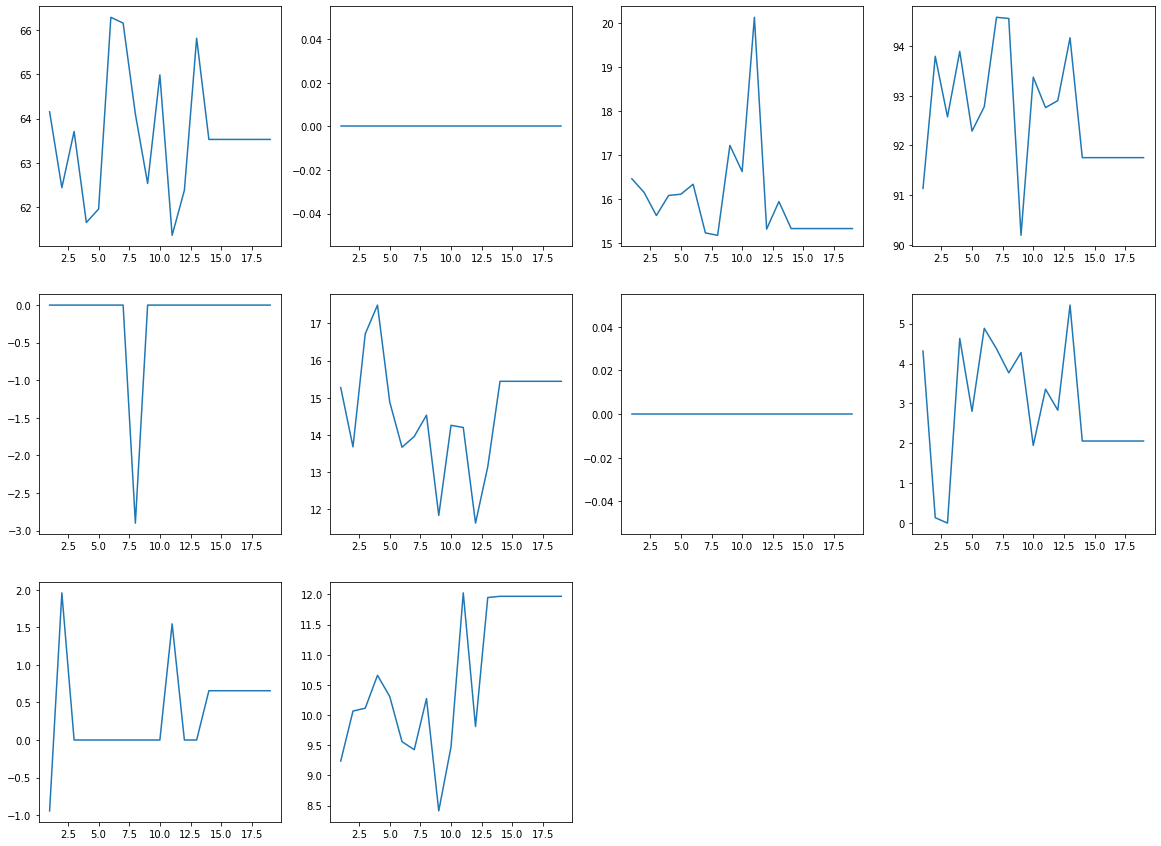

In [52]:
plt.figure(figsize=(20,15))
for n in range(1, 10):
    ax = plt.subplot(int('34{}'.format(n)))
    ax.plot(list(range(1, 20, 1)), coef[:, n-1])
    
ax = plt.subplot(3,4,10)
ax.plot(list(range(1, 20, 1)), intercept)

# 3. "Предсказание" числа в другой системе исчисления

Построим линейную модель которая переводит числа из *двоичной* системы исчисления в *десятичную*. Для этого сгенерируйте тренировочную выборку размера 10000 наблюдений, в которой в качестве признаков выступают бинарные векторы длины 32, а в качестве `y` значение в десятичной системе исчисления. Например:

- $x_1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]$, $y_1 = 0$
- $x_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]$, $y_2 = 525856$
- $x_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]$, $y_3 = 3$


1. Обучите 3 линейные модели на **всех наблюдениях**: Линейная регрессия, Лассо регрессия, Гребневая регрессия (для всех моделей устновите параметр `fit_intercept=False`, что контролирует этот параметр?).
2. Сравните ошибку, например MSE для всех трех моделей.
3. Сравните коэффиценты обученных моделей, что вы можете о них сказать?
4. Разделите ваши данные на тренировочную и тестовую выборки, обучите модели на тренировочной части данных, сделайте предсказание на тестовой. Сравните коэффициенты обученных моделей, сравните качество (в терминах MSE) на тестовой и тренировочной выборках.
5. Объясните поведение Лассо и Гребневой регрессии.


In [39]:
'''
 Построение выборки
'''
X_bin = np.random.randint(2, size = (10000, 32))
y_bin = np.zeros(shape = 10000)
for i in range(10000) :
  for j in range(32) :
    y_bin[i] += int(X_bin[i, 31 - j]*(2**j))

In [40]:
X_bin

array([[0, 1, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [1, 0, 1, ..., 1, 1, 0]])

In [41]:
y_bin

array([1.58232508e+09, 9.29872191e+08, 1.25307431e+09, ...,
       1.33641089e+09, 5.00485267e+08, 2.86938963e+09])

In [42]:
bin = LinearRegression(fit_intercept = False)
bin_lasso = Lasso(alpha = 0.05, fit_intercept = False, random_state = 33)
bin_ridge = Ridge(alpha=0.05, fit_intercept = False, random_state = 33)

In [43]:
bin.fit(X_bin, y_bin)
y_bin_pred = bin.predict(X_bin)
print('MSE with LinearRegression : {}'.format(mean_squared_error(y_bin, y_bin_pred)))

bin_lasso.fit(X_bin, y_bin)
y_bin_lasso_pred = bin_lasso.predict(X_bin)
print('MSE with Lasso : {}'.format(mean_squared_error(y_bin, y_bin_lasso_pred)))

bin_ridge.fit(X_bin, y_bin)
y_bin_ridge_pred = bin_ridge.predict(X_bin)
print('MSE with Ridge : {}'.format(mean_squared_error(y_bin, y_bin_ridge_pred)))

MSE with LinearRegression : 6.946633988084386e-12
MSE with Lasso : 4875898135474.243
MSE with Ridge : 566202521.6625099


In [44]:
print('Coef of LinearRegression : {}'.format(bin.coef_))

print('Coef of Lasso : {}'.format(bin_lasso.coef_))

print('Coef of Ridge : {}'.format(bin_ridge.coef_))

Coef of LinearRegression : [2.14748365e+09 1.07374182e+09 5.36870912e+08 2.68435456e+08
 1.34217728e+08 6.71088640e+07 3.35544320e+07 1.67772160e+07
 8.38860800e+06 4.19430400e+06 2.09715200e+06 1.04857600e+06
 5.24288000e+05 2.62144000e+05 1.31072000e+05 6.55360000e+04
 3.27680000e+04 1.63840000e+04 8.19200000e+03 4.09600000e+03
 2.04800000e+03 1.02400000e+03 5.12000000e+02 2.55999999e+02
 1.28000001e+02 6.39999991e+01 3.19999996e+01 1.59999996e+01
 7.99999920e+00 3.99999973e+00 2.00000018e+00 1.00000125e+00]
Coef of Lasso : [ 2.14857802e+09  1.07493407e+09  5.37909239e+08  2.69492129e+08
  1.35108268e+08  6.78987752e+07  3.43484743e+07  1.72210343e+07
  8.68169866e+06  4.37384751e+06  2.00958612e+06  6.93955890e+05
 -1.83193240e+04 -4.78242194e+05 -6.82908165e+05 -9.06935982e+05
 -9.63892469e+05 -1.11011461e+06 -1.13754060e+06 -1.12139249e+06
 -1.02321227e+06 -8.28650598e+05 -7.31698705e+05 -5.75695250e+05
 -3.74862966e+05 -1.66821344e+05  3.86738769e+04  2.28786538e+05
  4.26477533e

In [49]:
'''
Разделим выборку
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bin,y_bin,)

In [50]:
bin.fit(X_train, y_train)
y_bin_pred_train = bin.predict(X_train)
y_bin_pred_test = bin.predict(X_test)
print('MSE with LinearRegression on train : {}'.format(mean_squared_error(y_train, y_bin_pred_train)))
print('MSE with LinearRegression on test : {}'.format(mean_squared_error(y_test, y_bin_pred_test)))

bin_lasso.fit(X_train, y_train)
y_bin_lasso_pred_train = bin_lasso.predict(X_train)
y_bin_lasso_pred_test = bin_lasso.predict(X_test)
print('MSE with Lasso on train : {}'.format(mean_squared_error(y_train, y_bin_lasso_pred_train)))
print('MSE with Lasso on test : {}'.format(mean_squared_error(y_test, y_bin_lasso_pred_test)))

bin_ridge.fit(X_bin, y_bin)
y_bin_ridge_pred_train = bin_ridge.predict(X_train)
y_bin_ridge_pred_test = bin_ridge.predict(X_test)
print('MSE with Ridge on train : {}'.format(mean_squared_error(y_train, y_bin_ridge_pred_train)))
print('MSE with Ridge on test : {}'.format(mean_squared_error(y_test, y_bin_ridge_pred_test)))

MSE with LinearRegression on train : 4.864492368362701e-12
MSE with LinearRegression on test : 5.0057783671647594e-12
MSE with Lasso on train : 5096068612183.625
MSE with Lasso on test : 5309675358405.749
MSE with Ridge on train : 566613548.5878439
MSE with Ridge on test : 564969440.8864912


In [51]:
print('Coef of LinearRegression : {}'.format(bin.coef_))

print('Coef of Lasso : {}'.format(bin_lasso.coef_))

print('Coef of Ridge : {}'.format(bin_ridge.coef_))

Coef of LinearRegression : [2.14748365e+09 1.07374182e+09 5.36870912e+08 2.68435456e+08
 1.34217728e+08 6.71088640e+07 3.35544320e+07 1.67772160e+07
 8.38860800e+06 4.19430400e+06 2.09715200e+06 1.04857600e+06
 5.24288000e+05 2.62144000e+05 1.31072000e+05 6.55360000e+04
 3.27680000e+04 1.63840000e+04 8.19200000e+03 4.09600000e+03
 2.04800000e+03 1.02400000e+03 5.11999999e+02 2.56000000e+02
 1.28000000e+02 6.39999994e+01 3.19999988e+01 1.59999988e+01
 7.99999991e+00 4.00000030e+00 1.99999955e+00 1.00000012e+00]
Coef of Lasso : [ 2.14861590e+09  1.07496728e+09  5.37840748e+08  2.69484627e+08
  1.34954975e+08  6.77429959e+07  3.41757321e+07  1.70369927e+07
  8.47657857e+06  4.13712017e+06  1.81694978e+06  4.22236294e+05
 -2.38716993e+05 -6.81470741e+05 -8.38299307e+05 -1.03248354e+06
 -1.04424441e+06 -1.10855281e+06 -1.14004447e+06 -1.03611089e+06
 -9.34977918e+05 -7.57920770e+05 -5.26656512e+05 -4.06133770e+05
 -9.69505906e+04  3.27614688e+04  2.95598039e+05  4.37364627e+05
  6.19952456e

# 4. Стоимость дома

Для набора данных из ДЗ2 сравните отобранные с помощью RFE (топ-5, топ-10) признаки, с признаками отобранными с помощью
1. L1 регуляризации
2. L2 регуляризации

In [52]:
! git clone 'https://github.com/vanekek/iitp-ml-ds'

Cloning into 'iitp-ml-ds'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 179 (delta 12), reused 5 (delta 5), pack-reused 157
Receiving objects: 100% (179/179), 7.20 MiB | 14.68 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [56]:
import pandas as pd

In [57]:
df1 = pd.read_csv('/content/iitp-ml-ds/2023/seminar-2-lin-reg/kc_house_data_train.csv', index_col=0)
y = df1['price'].values
df1.drop(columns=['price'], inplace=True)

In [63]:
df1.drop(columns=['id','zipcode','lat','long','date'],inplace=True)

In [74]:
lr_lasso = Lasso(alpha = 0.5, fit_intercept = True, random_state = 33)
lr_ridge = Ridge(alpha = 1, fit_intercept = True, random_state = 33)

In [75]:
lr_lasso.fit(df1, y)
lr_ridge.fit(df1, y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.130e+14, tolerance: 1.974e+11
  model = cd_fast.enet_coordinate_descent(


Ridge(alpha=1, random_state=33)

In [76]:
for item in sorted(list(zip(df1.columns, list(lr_lasso.coef_))), reverse=True, key = lambda x: x[1]) :
  print('Feature: {} -- weight: {}'.format(item[0], item[1]))

Feature: waterfront -- weight: 564767.3389011587
Feature: grade -- weight: 121091.3633739348
Feature: bathrooms -- weight: 56782.166712605176
Feature: view -- weight: 44554.810177886044
Feature: floors -- weight: 22083.151802355427
Feature: condition -- weight: 16563.13940596039
Feature: sqft_living -- weight: 293.05454818664157
Feature: sqft_living15 -- weight: 27.168191507665636
Feature: yr_renovated -- weight: 11.217094947286713
Feature: sqft_lot -- weight: -0.0598958583480378
Feature: sqft_lot15 -- weight: -0.5422914066122477
Feature: sqft_basement -- weight: -133.15158225618302
Feature: sqft_above -- weight: -135.47314973761098
Feature: yr_built -- weight: -3680.3621610166756
Feature: bedrooms -- weight: -40120.3772128789


In [77]:
for item in sorted(list(zip(df1.columns, list(lr_ridge.coef_))), reverse=True, key = lambda x: x[1]) :
  print('Feature: {} -- weight: {}'.format(item[0], item[1]))

Feature: waterfront -- weight: 558180.1834207438
Feature: grade -- weight: 121064.89864670423
Feature: bathrooms -- weight: 56764.56548720221
Feature: view -- weight: 44826.492663497665
Feature: floors -- weight: 22080.138046550157
Feature: condition -- weight: 16570.964288908726
Feature: sqft_living -- weight: 105.85908930514668
Feature: sqft_basement -- weight: 54.06671283242597
Feature: sqft_above -- weight: 51.79220286991775
Feature: sqft_living15 -- weight: 27.125059889016054
Feature: yr_renovated -- weight: 11.300127622622293
Feature: sqft_lot -- weight: -0.06006317445802371
Feature: sqft_lot15 -- weight: -0.5420860084317163
Feature: yr_built -- weight: -3679.59713211763
Feature: bedrooms -- weight: -40142.630828512425


## Подготовьте репорт о выполненном домашнем задании

Подготовьте текстовый репорт о выполенном домашнем задании. 

Вы можете вставлять в текст таблицы и/или графики на ваше усмотрение, текст репорта должен быть в двухколоночном формате не более 2 страниц 12 кеглем Times New Roman (крайне желательно 1 страница), см. шаблон https://docs.google.com/document/d/1YqnO0OFbTR7XgzmdWryQF22J1kl9Fg7hSlNbqa6Jbiw/edit?usp=sharing

Подготовленный репорт и jupyter notebook c вашим решением необходимо отправить на почту kurmukovai@gmail.com, с темой письма [iitp-intro-ds-2023-ha3-Surname], например [iitp-intro-ds-2023-ha3-Kurmukov] до 23:59:59 МСК 10.03.2023.